In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
df.shape

(7668, 15)

In [4]:
# Let's see if is there any missing data

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Percentage of missing values

df.isna().mean()*100

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

# Handling Missing Values in the dataset

In [6]:
#indexes of missing values in 'runtime' column

df[df['runtime'].isna()]

name rating   genre  year  \
5728  Saw: The Final Chapter      R   Crime  2010   
5730             The Wolfman      R   Drama  2010   
6195       One for the Money  PG-13  Action  2012   
7665           Saving Mbango    NaN   Drama  2020   

                              released  score     votes             director  \
5728                               NaN    5.6   93000.0       Kevin Greutert   
5730                               NaN    5.8  104000.0         Joe Johnston   
6195  January 27, 2012 (United States)    5.3   41000.0  Julie Anne Robinson   
7665         April 27, 2020 (Cameroon)    5.7      29.0         Nkanya Nkwai   

                   writer              star        country      budget  \
5728       Patrick Melton        Tobin Bell            NaN         NaN   
5730  Andrew Kevin Walker  Benicio Del Toro            NaN         NaN   
6195        Stacy Sherman   Katherine Heigl  United States  40000000.0   
7665         Lynno Lovert      Onyama Laura  United States     58750.0   

           gross                  company  runtime  
5728         NaN                      NaN      NaN  
5730         NaN                      NaN      NaN  
6195  38084162.0  Lakeshore Entertainment      NaN  
7665         NaN         Embi Productions      NaN

In [7]:
#removing mising values

df = df.drop(index=[5728,5730,6195,7665])

In [8]:
df.shape

(7664, 15)

In [9]:
df[df.company.isna()].index

Int64Index([ 408,  464,  469,  633,  969, 1033, 1572, 1594, 1630, 1806, 7599,
            7657, 7662, 7663, 7666],
           dtype='int64')

In [10]:
df.company.value_counts()

Universal Pictures          377
Warner Bros.                334
Columbia Pictures           332
Paramount Pictures          320
Twentieth Century Fox       240
                           ... 
Digital Image Associates      1
Kopelson Entertainment        1
Clavius Base                  1
Tim Burton Productions        1
PK 65 Films                   1
Name: company, Length: 2384, dtype: int64

In [11]:
df=df.drop(index=(df[df.company.isna()].index))

In [12]:
df.shape

(7649, 15)

In [13]:
df.gross

0        46998772.0
1        58853106.0
2       538375067.0
3        83453539.0
4        39846344.0
           ...     
7659        13266.0
7660            NaN
7661            NaN
7664            NaN
7667            NaN
Name: gross, Length: 7649, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross'>

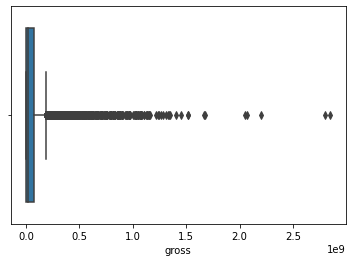

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df.gross)

In [15]:
df['gross'].describe()

count    7.468000e+03
mean     7.860498e+07
std      1.658242e+08
min      3.090000e+02
25%      4.554869e+06
50%      2.023778e+07
75%      7.608764e+07
max      2.847246e+09
Name: gross, dtype: float64

In [16]:
print(df.gross.mean())
print(df.gross.median())

78604979.10163364
20237777.0


(array([5.224e+03, 8.730e+02, 4.340e+02, 2.690e+02, 1.500e+02, 1.190e+02,
        1.010e+02, 5.200e+01, 4.200e+01, 3.300e+01, 2.600e+01, 2.000e+01,
        1.500e+01, 2.200e+01, 1.200e+01, 1.500e+01, 1.100e+01, 6.000e+00,
        1.400e+01, 6.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([3.09000000e+02, 5.69452269e+07, 1.13890145e+08, 1.70835063e+08,
        2.27779981e+08, 2.84724898e+08, 3.41669816e+08, 3.98614734e+08,
        4.55559652e+08, 5.12504570e+08, 5.69449488e+08, 6.26394406e+08,
        6.83339324e+08, 7.40284241e+08, 7.97229159e+08, 8.54174077e+08,
        9.11118995e+08, 9.68063913e+08, 1.02500883e+09, 1.08195375e+09,
        1.138898

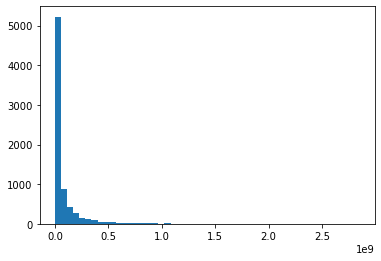

In [17]:
plt.hist(df.gross,bins=50)

In [18]:
# Replacing null values with the median

df['gross'] = df['gross'].fillna(df['gross'].median())

In [19]:
df.isna().sum()

name           0
rating        71
genre          0
year           0
released       0
score          1
votes          1
director       0
writer         3
star           1
country        1
budget      2160
gross          0
company        0
runtime        0
dtype: int64

In [20]:
df[df.country.isna()]

name rating   genre  year                       released  score  \
7615  Clinton Road    NaN  Horror  2019  June 14, 2019 (United States)    5.9   

       votes        director       writer       star country     budget  \
7615  1900.0  Richard Grieco  Noel Ashman  Ace Young     NaN  2500000.0   

        gross                   company  runtime  
7615  50400.0  Growing Tree Productions     77.0

In [21]:
df = df.drop(index=7615)

In [22]:
df[df.star.isna()]

name rating    genre  year  \
474  The Business of Show Business    NaN  History  1983   

                       released  score  votes   director     writer star  \
474  February 15, 1983 (Canada)    8.3   79.0  Tom Logan  Tom Logan  NaN   

    country    budget       gross company  runtime  
474  Canada  323562.0  20237777.0     CTV     55.0

In [23]:
# dropping the rows with null values

df = df.drop(index=474)

In [24]:
df[df.writer.isna()]

name     rating      genre  year  \
1820             The Garden    Unrated      Drama  1990   
5834               The Trip  Not Rated     Comedy  2010   
7655  Legend of Deification      TV-PG  Animation  2020   

                             released  score    votes              director  \
1820             1990 (United States)    6.4    840.0          Derek Jarman   
5834          April 24, 2011 (Greece)    7.0  22000.0  Michael Winterbottom   
7655  October 1, 2020 (United States)    6.6   1300.0            Teng Cheng   

     writer            star         country  budget        gross  \
1820    NaN   Tilda Swinton  United Kingdom     NaN       5006.0   
5834    NaN    Steve Coogan  United Kingdom     NaN    3945217.0   
7655    NaN  Guangtao Jiang           China     NaN  240663149.0   

                       company  runtime  
1820   Basilisk Communications     92.0  
5834      Baby Cow Productions    112.0  
7655  Beijing Enlight Pictures    110.0

In [25]:
df = df.drop(index=[1820,5834,7655])

In [26]:
# Data types of our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [27]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [28]:
df.isna().sum()

name           0
rating        69
genre          0
year           0
released       0
score          1
votes          1
director       0
writer         0
star           0
country        0
budget      2157
gross          0
company        0
runtime        0
dtype: int64

In [29]:
df[df['score'].isna()]

name rating  genre  year                          released  \
7661  Love by Drowning      R  Drama  2020  November 6, 2020 (United States)   

      score  votes           director         writer          star  \
7661    NaN    NaN  Justin Kreinbrink  C.E. Poverman  Nicky Whelan   

            country     budget       gross         company  runtime  
7661  United States  1000000.0  20237777.0  Dow Jazz Films    121.0

In [30]:
df = df.drop(index=7661)

In [31]:
df[df['votes'].isna()]

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget'>

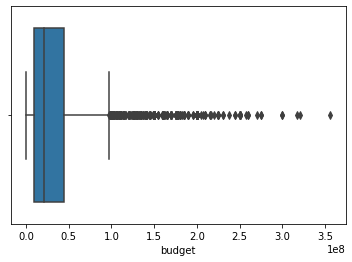

In [32]:
sns.boxplot(df['budget'])

In [33]:
df.budget.describe()

count    5.486000e+03
mean     3.565172e+07
std      4.147268e+07
min      3.000000e+03
25%      1.000000e+07
50%      2.100000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

In [34]:
df['budget'] = df['budget'].fillna(df.budget.median())

In [35]:
df.isna().sum()

name         0
rating      69
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
dtype: int64

In [36]:
df.rating.value_counts()

R            3689
PG-13        2110
PG           1249
Not Rated     282
G             153
Unrated        50
NC-17          23
TV-MA           9
TV-PG           4
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [37]:
df.rating = df.rating.fillna('R')

In [38]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [39]:
# Change Data types of our columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [40]:
df.head(2)

name rating      genre  year                       released  \
0      The Shining      R      Drama  1980  June 13, 1980 (United States)   
1  The Blue Lagoon      R  Adventure  1980   July 2, 1980 (United States)   

   score     votes         director                   writer            star  \
0    8.4  927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8   65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country    budget     gross            company  runtime  
0  United Kingdom  19000000  46998772       Warner Bros.    146.0  
1   United States   4500000  58853106  Columbia Pictures    104.0

In [41]:
df.released

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7658    February 7, 2020 (United States)
7659       March 3, 2020 (United States)
7660    November 5, 2020 (United States)
7664    February 7, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7643, dtype: object

In [42]:
# Create correct year column

df['Yearcorrect'] = df['released'].astype(str).str[7:13]

In [43]:
df.head(2)

name rating      genre  year                       released  \
0      The Shining      R      Drama  1980  June 13, 1980 (United States)   
1  The Blue Lagoon      R  Adventure  1980   July 2, 1980 (United States)   

   score     votes         director                   writer            star  \
0    8.4  927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8   65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country    budget     gross            company  runtime Yearcorrect  
0  United Kingdom  19000000  46998772       Warner Bros.    146.0      , 1980  
1   United States   4500000  58853106  Columbia Pictures    104.0       1980

In [44]:
df.Yearcorrect.dtype

dtype('O')

In [45]:
#df.sort_values(by=['gross'],inplace=False, ascending=False)

In [46]:
pd.set_option('display.max_rows', None)

In [47]:
# Drop any duplicates

#df['company'].drop_duplicates().sort_values(ascending=False)

In [48]:
df = df.drop_duplicates()

In [49]:
# Budget High Correlation
# Company High Correlation


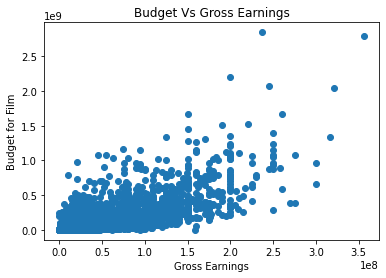

In [50]:
# Scatter plot with budget vs Gross

plt.scatter(x='budget',y='gross',data=df)

plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

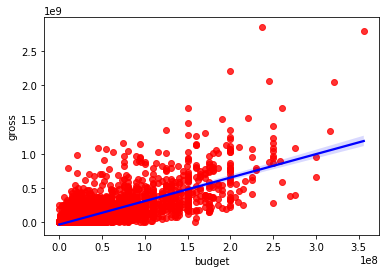

In [51]:
# Plot Budget Vs Gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

## Finding Correlation in Dataset

In [52]:
df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.098278  0.223353  0.292600  0.260209  0.119789
score    0.098278  1.000000  0.409432  0.061525  0.185335  0.399965
votes    0.223353  0.409432  1.000000  0.459610  0.632057  0.308907
budget   0.292600  0.061525  0.459610  1.000000  0.745296  0.272944
gross    0.260209  0.185335  0.632057  0.745296  1.000000  0.244123
runtime  0.119789  0.399965  0.308907  0.272944  0.244123  1.000000

In [53]:
# High Correlation between budget and gross

In [54]:
#Correlaton

df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.098278  0.223353  0.292600  0.260209  0.119789
score    0.098278  1.000000  0.409432  0.061525  0.185335  0.399965
votes    0.223353  0.409432  1.000000  0.459610  0.632057  0.308907
budget   0.292600  0.061525  0.459610  1.000000  0.745296  0.272944
gross    0.260209  0.185335  0.632057  0.745296  1.000000  0.244123
runtime  0.119789  0.399965  0.308907  0.272944  0.244123  1.000000

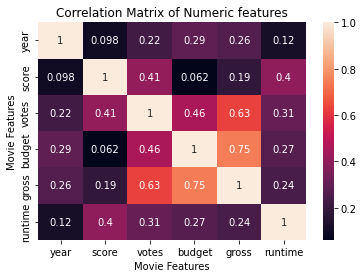

In [55]:
Correlation_matrix = df.corr()

sns.heatmap(Correlation_matrix,annot=True)

plt.title('Correlation Matrix of Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [56]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6566       6      6  1980      1701    8.4   927000.0      2577    3999   
1     5555       6      1  1980      1488    5.8    65000.0      2260    1628   
2     5126       4      0  1980      1767    8.7  1200000.0      1109    2558   
3      285       4      4  1980      1488    7.7   221000.0      1297    1994   
4     1026       6      4  1980      1539    7.3   108000.0      1052     518   
5     2106       6      9  1980      2497    6.4   123000.0      2516    4346   
6     5556       6      0  1980      1767    7.9   188000.0      1408     834   
7     4422       6      3  1980       696    8.2   330000.0      1821    1765   
8     5263       4      0  1980      1749    6.8   101000.0      2295    1974   
9     6193       6      3  1980      2281    7.0    10000.0      2850     420   
10     462       4      0  1980       671    6.1    18000.0       357    3970   
11    5900       4      1  1980      2978    7.3    54000.0      1196    1827   
12    4301       4      1  1980       623    5.3    30000.0      2341    2325   
13    4071       6      6  1980      3202    7.7    49000.0      2377    2319   
14    1685       6      5  1980      1539    7.1    37000.0       318     517   
15    5008       4      6  1980      3012    7.2    27000.0      1240    3534   
16    1897       6      6  1980      2281    6.6    21000.0        49     731   
17      92       4      4  1980       696    6.9    29000.0       514    3248   
18    5846       6      9  1980      1104    6.8    66000.0      1370    2097   
19    5172       6      4  1980       623    6.8    26000.0      2549     553   
20    1385       6      5  1980       942    6.5    20000.0      2877    4435   
21    2447       6      1  1980       159    6.8    14000.0      1884    2914   
22    5826       4      0  1980       278    6.7    22000.0       743    4177   
23    7421       4      8  1980       582    5.3    12000.0      2360    3514   
24    7104       4      6  1980      1909    6.4    14000.0      1151      12   
25     345       6      9  1980       770    6.9    33000.0      1577    3220   
26    3255       6      4  1980      2055    6.5     5100.0      2421    2474   
27    4428       4      0  1980       278    5.0     4100.0      1279      33   
28     979       6      5  1980      1767    7.2    17000.0      2661    4370   
29     361       6      5  1980       883    6.2    22000.0      2142    3312   
30    3784       4      4  1980      3286    7.1     8900.0      2797      83   
31    4359       6      9  1980      1463    5.4    16000.0      2134    4439   
32    4971       4      0  1980       339    5.3    15000.0      1039    1583   
33    1102       4      6  1980       159    6.1      604.0      1638     954   
34    4769       4      4  1980       696    6.7     9100.0      1222    3123   
35    4348       6      4  1980      2810    6.2    24000.0      1089    3094   
36    5988       6      4  1980      2447    6.3     4300.0       854    1354   
37    3709       6      4  1980      2956    6.0    11000.0      1592    3628   
38    6082       4      6  1980       696    5.9     4000.0      2286    3812   
39    1242       4      3  1980      2191    7.5    17000.0      1876    4186   
40    6726       4      7  1980      3092    6.3     5700.0      1399     515   
41     926       4      6  1980      1584    7.9    13000.0       335    2245   
42    6623       6      0  1980      1832    7.1     9000.0      2303    2534   
43    7282       6      3  1980       167    6.6    11000.0       186    1678   
44    5486       6      9  1980      3033    4.8     2000.0      1970     150   
45    1151       6      4  1980      1463    6.1    12000.0      2790    4282   
46    6074       6      0  1980      1701    5.3     3900.0      1926    3343   
47    5560       6      9  1980      2768    4.6     3900.0      2822    4328   
48    6340       4      0  1980      

In [57]:
df.company.nunique()

2378

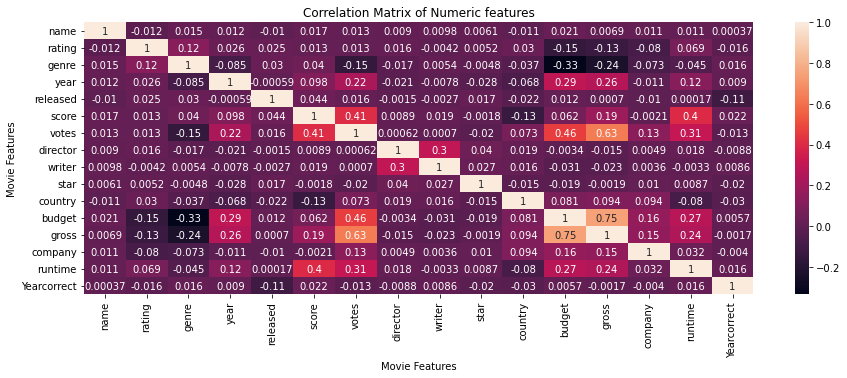

In [58]:
Correlation_matrix = df_numerized.corr()

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(Correlation_matrix,annot=True)

plt.title('Correlation Matrix of Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [59]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.012432  0.015231  0.011931 -0.010470  0.016603   
rating      -0.012432  1.000000  0.120671  0.026167  0.024510  0.013400   
genre        0.015231  0.120671  1.000000 -0.084693  0.030113  0.039793   
year         0.011931  0.026167 -0.084693  1.000000 -0.000594  0.098278   
released    -0.010470  0.024510  0.030113 -0.000594  1.000000  0.043729   
score        0.016603  0.013400  0.039793  0.098278  0.043729  1.000000   
votes        0.013239  0.013421 -0.150201  0.223353  0.016338  0.409432   
director     0.008970  0.016048 -0.016630 -0.021358 -0.001545  0.008872   
writer       0.009833 -0.004213  0.005389 -0.007794 -0.002700  0.019022   
star         0.006140  0.005230 -0.004816 -0.028390  0.016660 -0.001797   
country     -0.011042  0.030110 -0.036919 -0.068436 -0.022147 -0.133115   
budget       0.021368 -0.148601 -0.334889  0.292600  0.011627  0.061525   
gross        0.006887 -0.130700 -0.240752  0.260209  0.000704  0.185335   
company      0.010557 -0.080289 -0.072765 -0.010606 -0.009979 -0.002070   
runtime      0.010673  0.068676 -0.045087  0.119789  0.000171  0.399965   
Yearcorrect  0.000367 -0.015916  0.015648  0.008955 -0.114405  0.022348   

                votes  director    writer      star   country    budget  \
name         0.013239  0.008970  0.009833  0.006140 -0.011042  0.021368   
rating       0.013421  0.016048 -0.004213  0.005230  0.030110 -0.148601   
genre       -0.150201 -0.016630  0.005389 -0.004816 -0.036919 -0.334889   
year         0.223353 -0.021358 -0.007794 -0.028390 -0.068436  0.292600   
released     0.016338 -0.001545 -0.002700  0.016660 -0.022147  0.011627   
score        0.409432  0.008872  0.019022 -0.001797 -0.133115  0.061525   
votes        1.000000  0.000622  0.000700 -0.019819  0.073448  0.459610   
director     0.000622  1.000000  0.299397  0.039811  0.019410 -0.003408   
writer       0.000700  0.299397  1.000000  0.027071  0.015722 -0.031278   
star        -0.019819  0.039811  0.027071  1.000000 -0.014582 -0.019280   
country      0.073448  0.019410  0.015722 -0.014582  1.000000  0.080656   
budget       0.459610 -0.003408 -0.031278 -0.019280  0.080656  1.000000   
gross        0.632057 -0.014846 -0.023192 -0.001898  0.094274  0.745296   
company      0.131659  0.004879  0.003574  0.010235  0.093813  0.164957   
runtime      0.308907  0.017980 -0.003251  0.008732 -0.080025  0.272944   
Yearcorrect -0.012731 -0.008785  0.008579 -0.019508 -0.029503  0.005723   

                gross   company   runtime  Yearcorrect  
name         0.006887  0.010557  0.010673     0.000367  
rating      -0.130700 -0.080289  0.068676    -0.015916  
genre       -0.240752 -0.072765 -0.045087     0.015648  
year         0.260209 -0.010606  0.119789     0.008955  
released     0.000704 -0.009979  0.000171    -0.114405  
score        0.185335 -0.002070  0.399965     0.022348  
votes        0.632057  0.131659  0.308907    -0.012731  
director    -0.014846  0.004879  0.017980    -0.008785  
writer      -0.023192  0.003574 -0.003251     0.008579  
star        -0.001898  0.010235  0.008732    -0.019508  
country      0.094274  0.093813 -0.080025    -0.029503  
budget       0.745296  0.164957  0.272944     0.005723  
gross        1.000000  0.154767  0.244123    -0.001746  
company      0.154767  1.000000  0.031965    -0.004010  
runtime      0.244123  0.031965  1.000000     0.016279  
Yearcorrect -0.001746 -0.004010  0.016279     1.000000

In [60]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.012432
             genre          0.015231
             year           0.011931
             released      -0.010470
             score          0.016603
             votes          0.013239
             director       0.008970
             writer         0.009833
             star           0.006140
             country       -0.011042
             budget         0.021368
             gross          0.006887
             company        0.010557
             runtime        0.010673
             Yearcorrect    0.000367
rating       name          -0.012432
             rating         1.000000
             genre          0.120671
             year           0.026167
             released       0.024510
             score          0.013400
             votes          0.013421
             director       0.016048
             writer        -0.004213
             star           0.005230
             country        0.030110
 

In [61]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334889
genre        budget        -0.334889
             gross         -0.240752
gross        genre         -0.240752
genre        votes         -0.150201
votes        genre         -0.150201
budget       rating        -0.148601
rating       budget        -0.148601
country      score         -0.133115
score        country       -0.133115
gross        rating        -0.130700
rating       gross         -0.130700
Yearcorrect  released      -0.114405
released     Yearcorrect   -0.114405
genre        year          -0.084693
year         genre         -0.084693
company      rating        -0.080289
rating       company       -0.080289
country      runtime       -0.080025
runtime      country       -0.080025
genre        company       -0.072765
company      genre         -0.072765
year         country       -0.068436
country      year          -0.068436
genre        runtime       -0.045087
runtime      genre         -0.045087
country      genre         -0.036919
g

In [62]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross        votes          0.632057
votes        gross          0.632057
gross        budget         0.745296
budget       gross          0.745296
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
Yearcorrect  Yearcorrect    1.000000
dtype: float64

In [63]:
# gross and budget have the highest correlation to gross earnings 